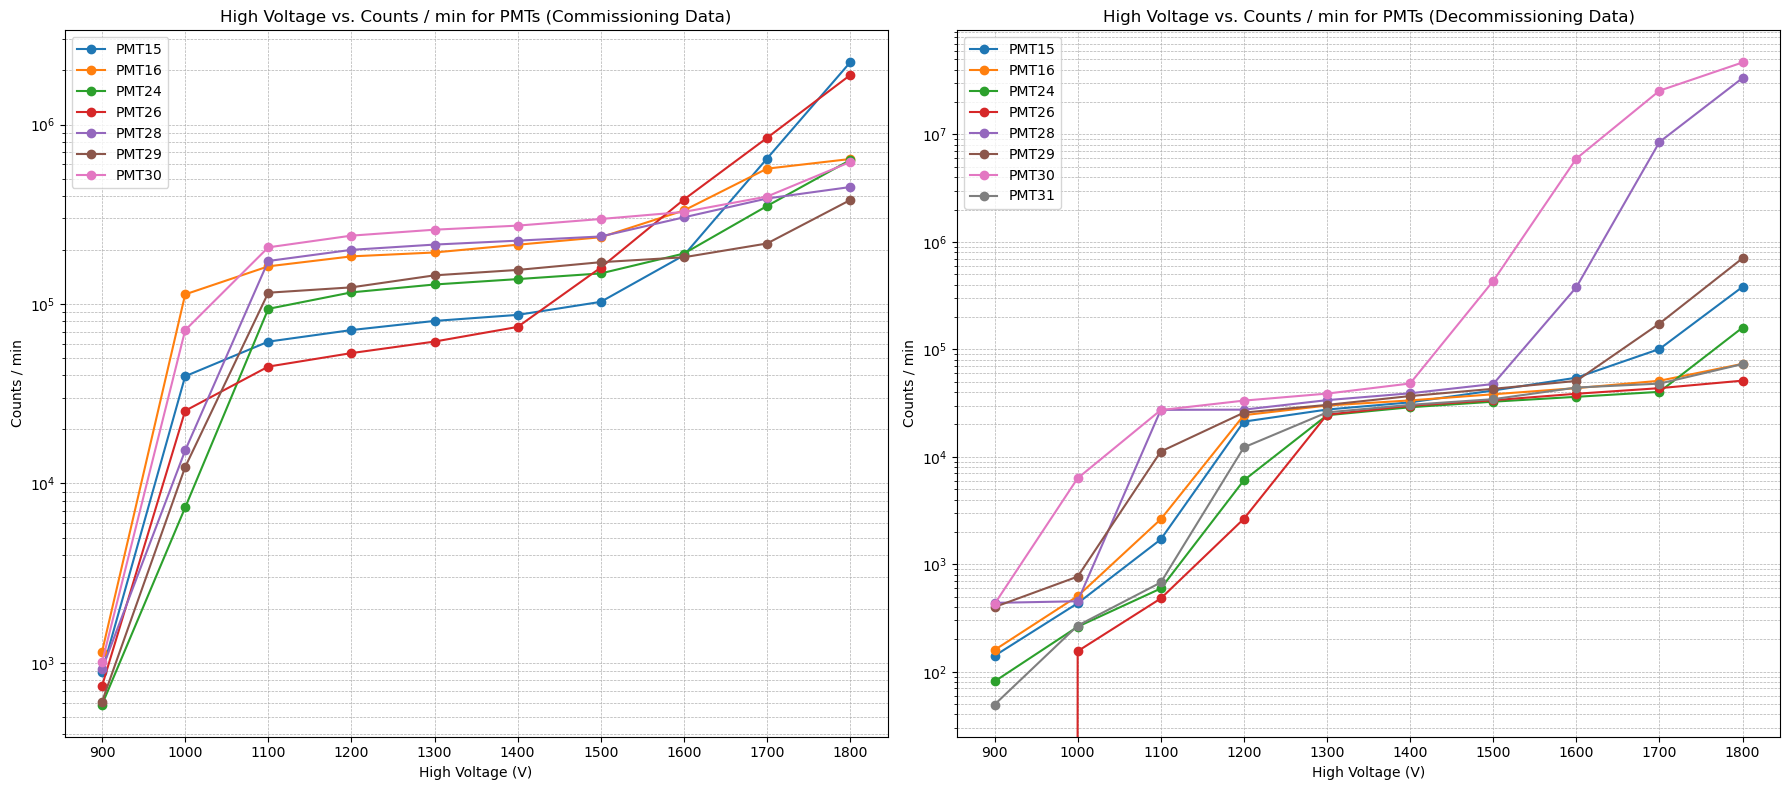

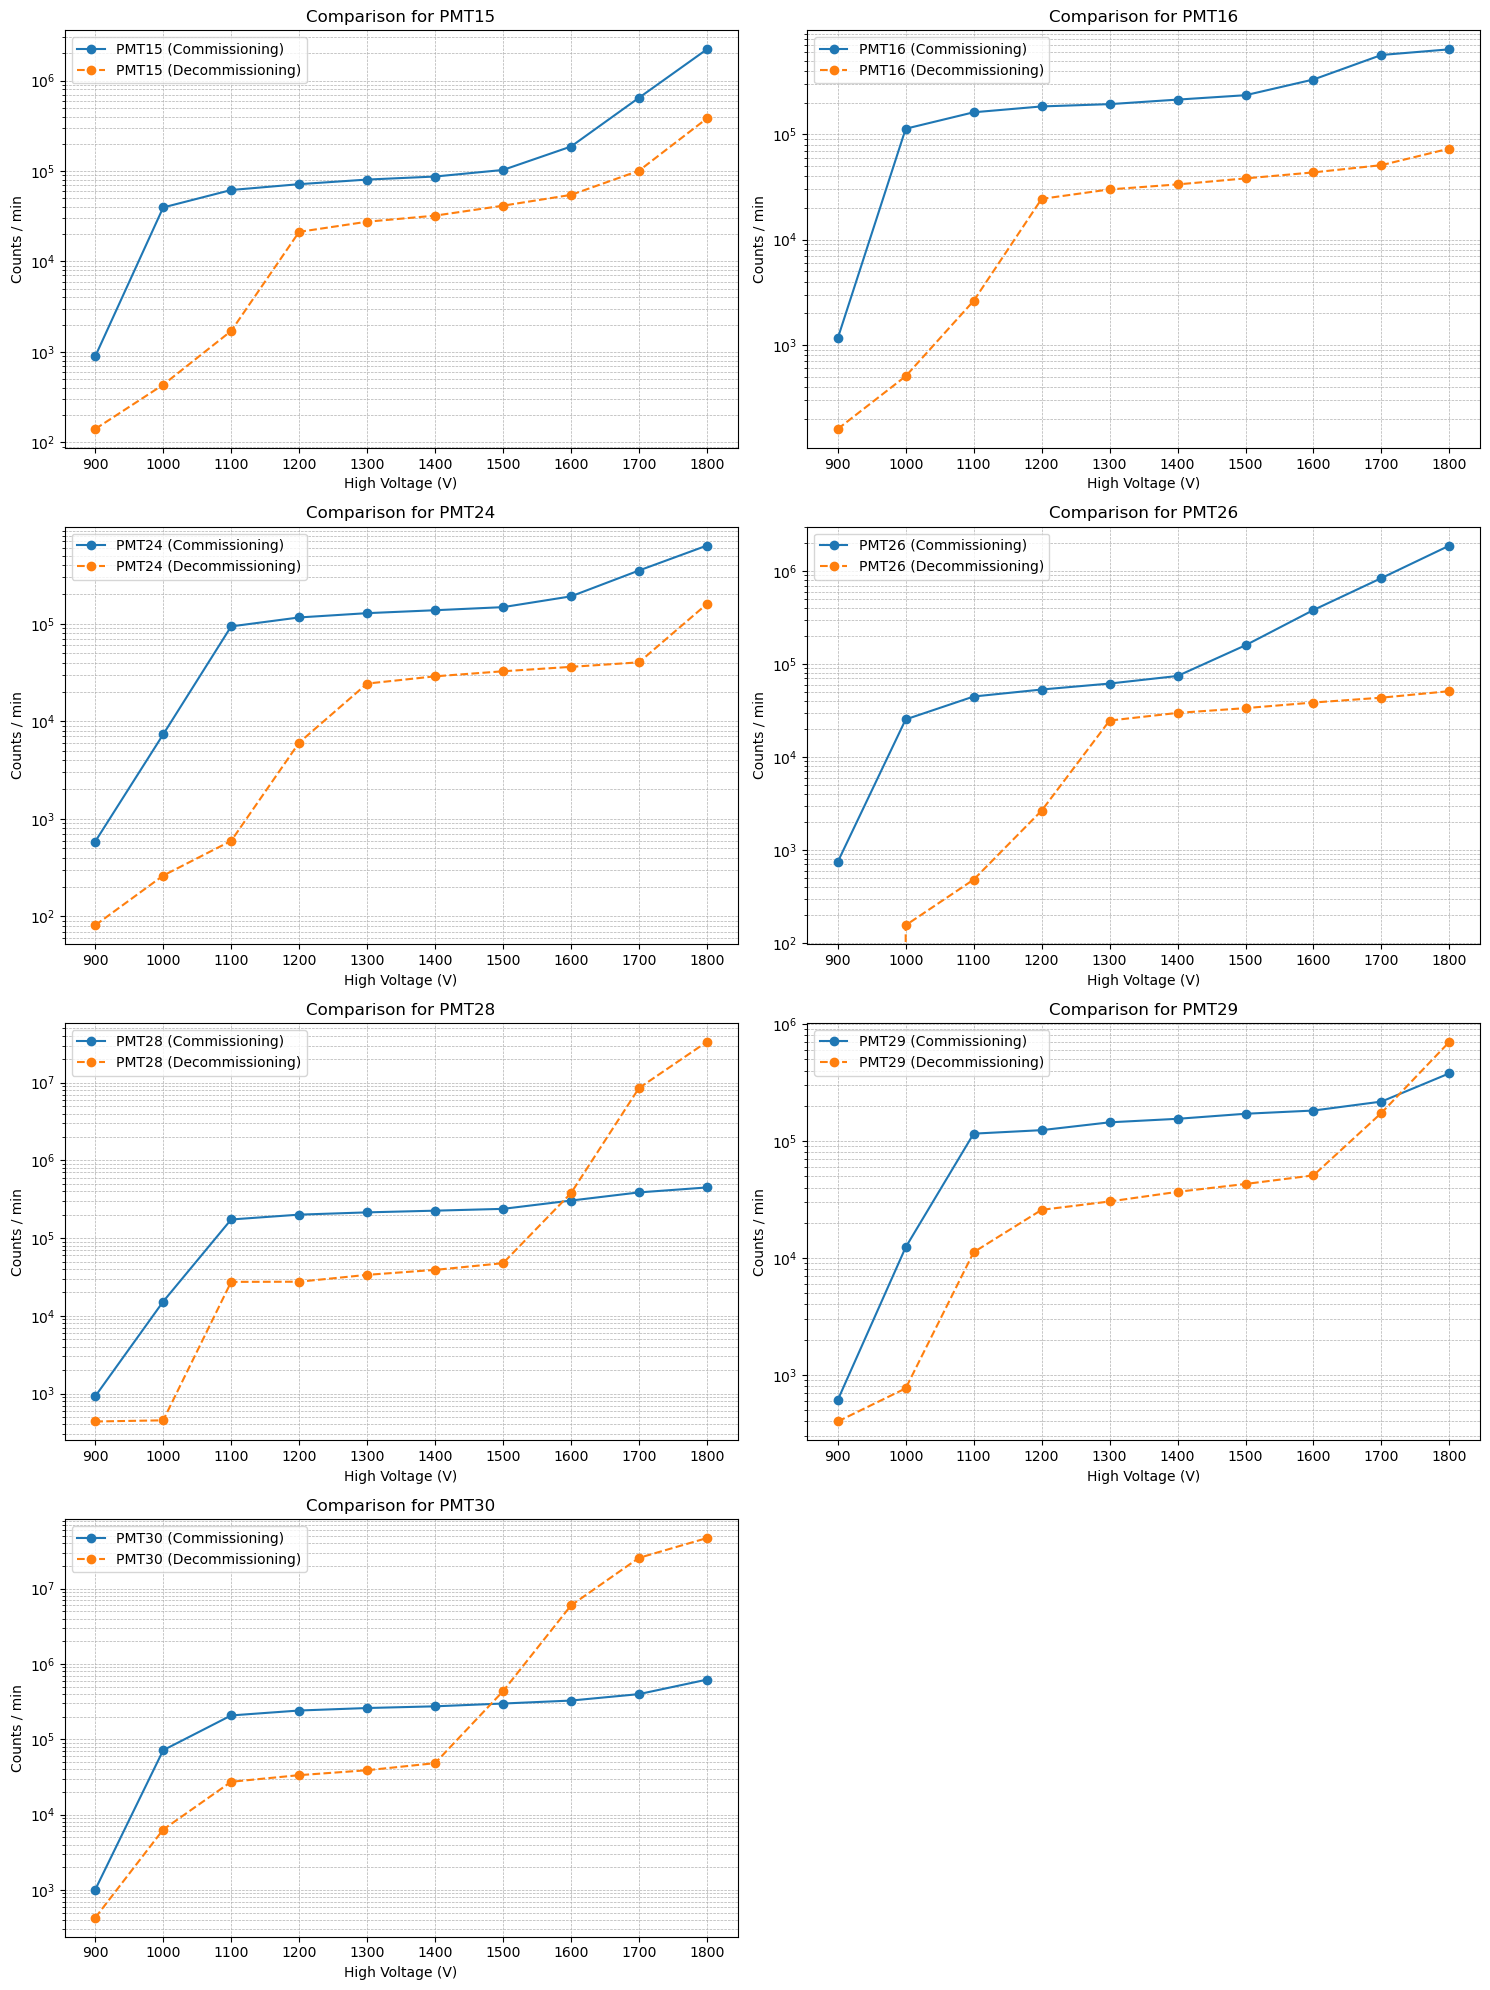

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first Excel file (PMT01-PMT30_warm.xls)
file_path_1 = '/Users/avinaybhat/Desktop/Coding/Oscilloscope/data/PMT01-PMT30_warm.xls'
xls_1 = pd.ExcelFile(file_path_1)

# Load the second Excel file (Channnel Mapping.xlsx)
file_path_2 = '/Users/avinaybhat/Desktop/Coding/Oscilloscope/data/Channnel Mapping.xlsx'
xls_2 = pd.ExcelFile(file_path_2)

# PMTs to analyze from the first file, ordered by PMT number
pmts_commissioning = ['PMT15', 'PMT16', 'PMT24', 'PMT26', 'PMT28', 'PMT29', 'PMT30']

# PMTs to analyze from the second file, combining all sheets, ordered by PMT number
pmt_9_july = [28, 30]
pmt_12_july = [15, 16, 24, 26]
pmt_13_june = [29, 31]
pmts_decommissioning = sorted(pmt_12_july + pmt_9_july + pmt_13_june)  # Combined and sorted by PMT number

# Voltage levels
voltage_levels = [900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
counts_columns = [
    'Counts at 900V', 'Counts at 1000V', 'Counts at 1100V',
    'Counts at 1200V', 'Counts at 1300V', 'Counts at 1400V',
    'Counts at 1500V', 'Counts at 1600V', 'Counts at 1700V',
    'Counts at 1800V with 10x amplifier, 45mV threshold / min'
]

# Part 1: Side-by-side plots for all PMTs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot for all PMTs from the first spreadsheet in the first subplot
for i, pmt in enumerate(pmts_commissioning):
    df = pd.read_excel(xls_1, sheet_name=pmt, header=1)
    high_voltage = df.iloc[0:12, 26]  # Column AA (High Voltage)
    noise_counts = df.iloc[0:12, 27]  # Column AB (Noise counts / min)
    ax1.plot(high_voltage, noise_counts, marker='o', label=pmt)

# Plot for all PMTs from the second spreadsheet in the second subplot, in the same order
for pmt_number in pmts_decommissioning:
    if pmt_number in pmt_9_july:
        df_decommissioning = pd.read_excel(xls_2, sheet_name='Data taking 9July')
    elif pmt_number in pmt_12_july:
        df_decommissioning = pd.read_excel(xls_2, sheet_name='Data taking 12July')
    else:
        df_decommissioning = pd.read_excel(xls_2, sheet_name='Data taking 13June')
    
    counts = df_decommissioning[df_decommissioning['PMT number'] == pmt_number][counts_columns].values.flatten() / 5
    ax2.plot(voltage_levels, counts, marker='o', label=f'PMT{pmt_number}')

# Set properties for the first subplot
ax1.set_xticks(voltage_levels)
ax1.set_yscale('log')
ax1.set_xlabel('High Voltage (V)')
ax1.set_ylabel('Counts / min')
ax1.set_title('High Voltage vs. Counts / min for PMTs (Commissioning Data)')
ax1.legend()
ax1.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set properties for the second subplot
ax2.set_xticks(voltage_levels)
ax2.set_yscale('log')
ax2.set_xlabel('High Voltage (V)')
ax2.set_ylabel('Counts / min')
ax2.set_title('High Voltage vs. Counts / min for PMTs (Decommissioning Data)')
ax2.legend()
ax2.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout for part 1
plt.tight_layout()
# Save the side-by-side plots as a PDF
plt.savefig('side_by_side_comparison.pdf')
plt.show()

# Part 2: Individual PMT comparisons
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

# Loop through each PMT and plot its comparison
for i, pmt in enumerate(pmts_commissioning):
    pmt_number = int(pmt.replace('PMT', ''))

    # Data from the first spreadsheet (Commissioning Data)
    df_commissioning = pd.read_excel(xls_1, sheet_name=pmt, header=1)
    noise_counts_commissioning = df_commissioning.iloc[:, 27].dropna().values  # Drop NaNs and get values

    # Data from the second spreadsheet (Decommissioning Data)
    if pmt_number in pmt_9_july:
        df_decommissioning = pd.read_excel(xls_2, sheet_name='Data taking 9July')
    elif pmt_number in pmt_12_july:
        df_decommissioning = pd.read_excel(xls_2, sheet_name='Data taking 12July')
    elif pmt_number in pmt_13_june:
        df_decommissioning = pd.read_excel(xls_2, sheet_name='Data taking 13June')
    
    noise_counts_decommissioning = df_decommissioning[df_decommissioning['PMT number'] == pmt_number][counts_columns].values.flatten() / 5

    # Check if lengths match and plot, otherwise skip
    if len(noise_counts_commissioning) == len(voltage_levels) and len(noise_counts_decommissioning) == len(voltage_levels):
        axes[i].plot(voltage_levels, noise_counts_commissioning, marker='o', linestyle='-', label=f'{pmt} (Commissioning)')
        axes[i].plot(voltage_levels, noise_counts_decommissioning, marker='o', linestyle='--', label=f'{pmt} (Decommissioning)')
    else:
        print(f"Warning: Skipping PMT {pmt} due to mismatched data lengths.")

    # Set properties
    axes[i].set_xticks(voltage_levels)
    axes[i].set_yscale('log')
    axes[i].set_xlabel('High Voltage (V)')
    axes[i].set_ylabel('Counts / min')
    axes[i].set_title(f'Comparison for {pmt}')
    axes[i].legend()
    axes[i].grid(True, which="both", linestyle='--', linewidth=0.5)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for part 2
plt.tight_layout()
# Save the individual PMT comparison plots as a PDF
plt.savefig('individual_pmt_comparisons.pdf')
plt.show()
